In [17]:
from brainlit.utils.ngl_pipeline import NeuroglancerSession
from brainlit.preprocessing.features import *
from brainlit.viz.visualize import *
import numpy as np
import pandas as pd
from cloudvolume import CloudVolume
from cloudvolume.lib import Bbox
import glob
import os

URL = "s3://mouse-light-viz/precomputed_volumes/brain1"
SIZE = [2, 2, 2]

In [10]:
nbr = neighborhood.NeighborhoodFeatures(
    url=URL, size=SIZE, offset=[15, 15, 15])
df_nbr = nbr.fit([2, 7], 5)

Downloading:   0%|          | 0/1 [00:00<?, ?it/s]


In [72]:
ind = SIZE[0]*2+1
arr = df_nbr.iloc[2,3:].values.reshape((ind, ind, ind))

In [112]:
def subsample(arr, orig_shape, dest_shape):
    """
    Subsamples a row from its original shape to another
    Parameters
    ----------
    arr : np.ndarray
        The flattened array
    orig_shape : tuple
        The original shape of the array before flattening
    dest_shape : tuple
        The desired shape of the array before flattening
    """
    start = np.subtract(orig_shape, dest_shape)//2
    end = start + dest_shape
    if len(orig_shape) is 2:
        idx = np.ravel_multi_index((np.mgrid[start[0]:end[0],start[1]:end[1]].reshape(2, -1)), orig_shape)
    elif len(orig_shape) is 3:
        idx = np.ravel_multi_index((np.mgrid[start[0]:end[0],start[1]:end[1],start[2]:end[2]].reshape(3, -1)), orig_shape)
    return arr[idx]

## 2d test

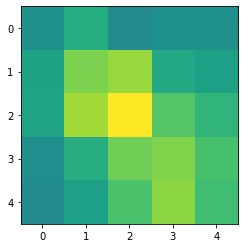

In [113]:
a1 = arr[2, :, :].flatten()
plt.imshow(arr[2, :, :]/np.max(a1), vmin=0, vmax=1)

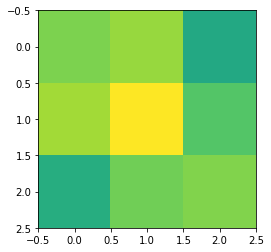

In [115]:
sub_a1 = subsample(a1, (5, 5), (3, 3))
plt.imshow(sub_a1.reshape((3,3))/np.max(a1), vmin=0, vmax=1)

#### even size test (rounds down)

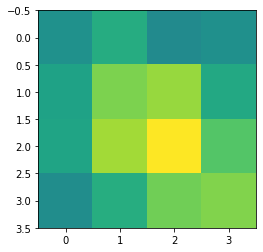

In [116]:
sub_a1 = subsample(a1, (5, 5), (4, 4))
plt.imshow(sub_a1.reshape((4,4))/np.max(a1), vmin=0, vmax=1)

## 3d test

In [95]:
arr

array([[[19161, 19983, 22879, 19607, 16594],
        [18864, 16015, 16995, 16866, 17033],
        [19007, 15378, 14930, 16852, 17878],
        [19993, 16217, 16568, 18172, 18287],
        [19585, 16741, 18486, 19896, 19111]],

       [[18358, 21221, 22250, 16960, 15346],
        [18003, 23385, 25448, 18951, 18324],
        [16817, 16656, 18795, 19440, 18777],
        [16064, 15958, 16902, 20615, 19056],
        [18029, 16999, 19765, 22033, 20336]],

       [[15534, 19063, 14720, 15493, 15457],
        [17762, 24711, 26002, 18603, 17502],
        [17943, 26563, 30773, 22539, 20107],
        [15084, 19115, 24112, 24960, 21793],
        [14560, 17545, 22016, 25525, 21325]],

       [[13650, 15247, 13918, 14761, 15337],
        [17442, 22352, 20712, 18062, 17149],
        [19705, 31562, 34366, 26039, 21655],
        [19483, 34962, 41279, 30076, 22383],
        [19624, 32791, 38477, 32109, 24962]],

       [[12977, 13042, 13312, 14027, 15061],
        [15476, 17730, 15814, 16844, 17614],
  

In [96]:
a1 = arr.flatten()
a1_sub = subsample(a1, (5, 5, 5), (3, 3, 3)).reshape((3, 3, 3))

In [99]:
a1_pad = np.pad(a1_sub, 1)

In [100]:
a1_pad == arr

array([[[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]],

       [[False, False, False, False, False],
        [False,  True,  True,  True, False],
        [False,  True,  True,  True, False],
        [False,  True,  True,  True, False],
        [False, False, False, False, False]],

       [[False, False, False, False, False],
        [False,  True,  True,  True, False],
        [False,  True,  True,  True, False],
        [False,  True,  True,  True, False],
        [False, False, False, False, False]],

       [[False, False, False, False, False],
        [False,  True,  True,  True, False],
        [False,  True,  True,  True, False],
        [False,  True,  True,  True, False],
        [False, False, False, False, False]],

       [[False, False, False, False, False],
        [False, False, False, False, False],
  